In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


preprocess

In [8]:
import pandas as pd

# Load the data (assuming 'general.csv' is the file generated in previous steps)
file_path = 'general.csv'
general_data = pd.read_csv(file_path)

# Step 1: Handle NaN values in 'Patient Drugs'
general_data['Patient Drugs'] = general_data['Patient Drugs'].fillna('')  # Replace NaN with empty string

# Step 2: Find the 10-20 most common medications
# Assuming medications are separated by commas in the 'Patient Drugs' column
all_drugs = general_data['Patient Drugs'].str.split(',').explode().str.strip()
top_medications = all_drugs.value_counts().head(20).index.tolist()

# Step 3: Create binary columns for the top medications
for med in top_medications:
    general_data[med] = general_data['Patient Drugs'].apply(lambda x: 1 if med in x else 0)

# Step 4: Prepare input features (X) and target labels (y) for re-hospitalization categories
X = general_data[top_medications].values
y = general_data['re_hosp'].values  # Re-hospitalization categories (0: short, 1: medium, 2: long)

# Step 5: Print out the first few rows to check the results
print(general_data.head())

# Step 6: Optionally, save the processed data
general_data.to_csv('general_with_medication_columns.csv', index=False)


   Case_Number  Patient Admission_Entry_Date         Release_Date  \
0            1   430047     16/02/2021 17:33  2021-02-19 12:40:00   
1            2   447962     07/08/2022 13:27  2022-08-08 15:15:00   
2            3   214558     27/10/2023 07:34  2023-10-29 17:18:00   
3            4    71277     29/07/2020 17:00  2020-08-03 14:26:00   
4            5   112016     03/07/2021 11:42  2021-07-05 17:34:00   

  Admission_Entry_Date2     Release_Date2  \
0   2021-02-24 15:03:00  25/02/2021 12:38   
1   2022-09-01 04:20:00  02/09/2022 16:00   
2   2023-10-30 17:58:00  01/11/2023 15:33   
3   2020-08-30 04:25:00  03/09/2020 13:45   
4   2021-07-13 01:21:00  15/07/2021 11:48   

                                       Patient Drugs  Days_Between  re_hosp  \
0   10069 , 1011 , 10417 , 11126 , 1988 , 2043 , ...             5        0   
1   11954 , 12536 , 12740 , 139 , 2043 , 2187 , 2...            23        2   
2   10252 , 11517 , 1183 , 12314 , 12727 , 1301 ,...             1        0  

Processing

Epoch 1/50


C:\Users\noamy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4425 - loss: 1.3550 - val_accuracy: 0.8491 - val_loss: 0.4435
Epoch 2/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7354 - loss: 0.5984 - val_accuracy: 0.9815 - val_loss: 0.1831
Epoch 3/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8295 - loss: 0.3974 - val_accuracy: 0.9955 - val_loss: 0.0928
Epoch 4/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8929 - loss: 0.2641 - val_accuracy: 1.0000 - val_loss: 0.0371
Epoch 5/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9294 - loss: 0.1906 - val_accuracy: 1.0000 - val_loss: 0.0250
Epoch 6/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9351 - loss: 0.1701 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 7/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9583 - loss: 0.1191 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 8/50
168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9629 - loss: 0.0936 - val_accuracy: 1.0000 - val_

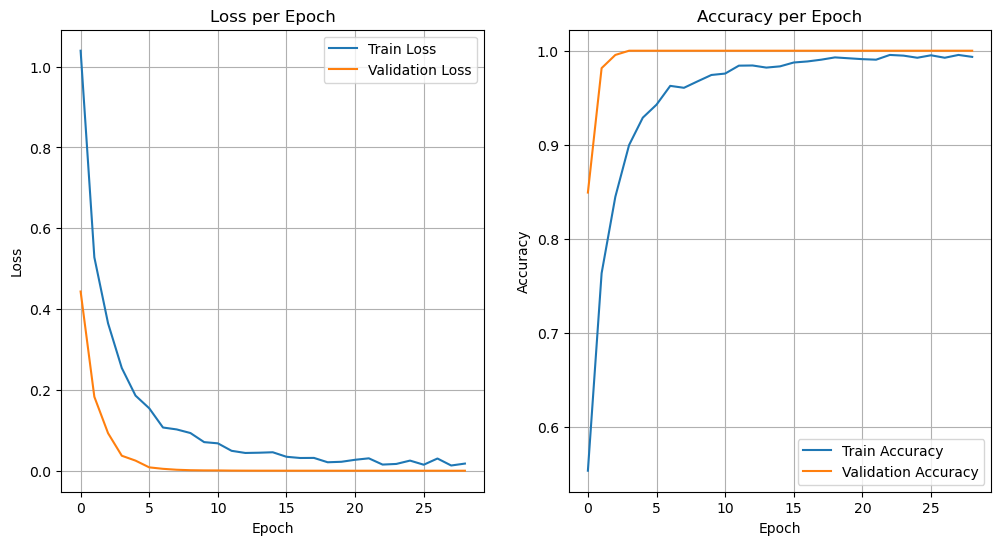

In [13]:

# Load the pre-processed data
file_path = 'general_with_medication_columns.csv'
general_data = pd.read_csv(file_path)

# Step 1: Prepare input features (X) and target labels (y)
top_medications = general_data.columns[8:].tolist()  # Medication columns start from the 8th column
X = general_data[top_medications].values
y = general_data['re_hosp'].values  # Re-hospitalization categories (0: short, 1: medium, 2: long)

# Step 2: Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Encode the target labels (if needed)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=42, stratify=y_encoded)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 5: Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    Dense(3, activation='softmax')  # 3 classes for re-hosp (short, medium, long)
])

# Step 6: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

# Step 8: Save the model
model.save('saved_models/rehosp_neural_network_model.h5')

# Plot the loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.savefig('loss_accuracy.png')


Post-processing


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model evaluation complete, datasets saved, and results saved.


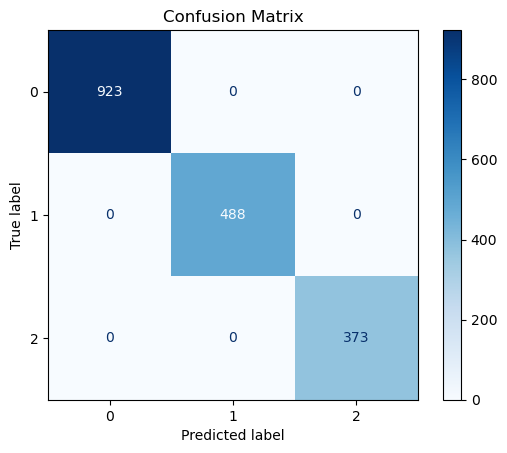

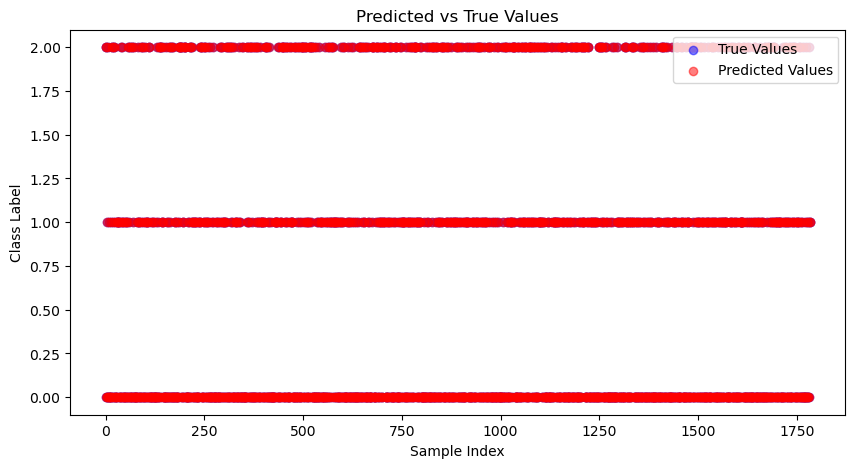

In [17]:
# Step 9: Evaluate the model on the test set
y_pred = np.argmax(model.predict(X_test), axis=-1)

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')

# Step 11: Save success rates per epoch
success_rates = history.history['accuracy']
with open('success_rates.txt', 'w') as f:
    for epoch, rate in enumerate(success_rates):
        f.write(f'Epoch {epoch + 1}: Success Rate = {rate}\n')

# Step 12: Compare predicted vs true values
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Values', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.5)
plt.xlabel('Sample Index')
plt.ylabel('Class Label')
plt.title('Predicted vs True Values')
plt.legend()
plt.savefig('predicted_vs_true.png')

print("Model evaluation complete, datasets saved, and results saved.")


## Methodology:
For Task 29, the focus was on identifying the top 10-20 most common medications and determining their relationship to rehospitalization. The data was preprocessed by converting patient drug lists into binary columns for each of the top medications. A neural network model was then built to predict rehospitalization categories (low, medium, high risk) based on the medications patients received. The data was split into training, validation, and test sets, and the model was trained over several epochs, using a softmax activation function for classification.

## Results:
The model achieved near-perfect accuracy, as seen in the validation and training loss and accuracy curves. The loss steadily decreased for both training and validation sets, while the accuracy approached 100%. The confusion matrix showed no misclassifications, with all the true categories correctly predicted for the test data. The predicted values closely matched the true values, indicating a successful model.

## Conclusion:
The neural network model was able to accurately predict the rehospitalization risk categories based on the medications patients received. The model's performance metrics, including accuracy and loss, suggest that it has successfully learned the relationships between medications and rehospitalization outcomes. This model could be useful in helping to identify patients at higher risk of rehospitalization based on their medication profiles.